In [8]:
!mkdir {os.path.join(os.getenv('USERPROFILE'), '.kaggle')}


In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:08<00:00, 203MB/s]
100% 1.06G/1.06G [00:08<00:00, 138MB/s]


In [14]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [16]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [25]:
# create CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 110ms/step - loss: 1.3867 - accuracy: 0.5670 - val_loss: 1.5687 - val_accuracy: 0.5304
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.6513 - accuracy: 0.6147 - val_loss: 0.6384 - val_accuracy: 0.5920
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5499 - accuracy: 0.7005 - val_loss: 0.5485 - val_accuracy: 0.7166
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4802 - accuracy: 0.7541 - val_loss: 0.4768 - val_accuracy: 0.7390
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4274 - accuracy: 0.7894 - val_loss: 0.5013 - val_accuracy: 0.7152
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3768 - accuracy: 0.8191 - val_loss: 0.4948 - val_accuracy: 0.7648
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3407 - accuracy: 0.8378 - val_loss: 0.5686 - val_ac

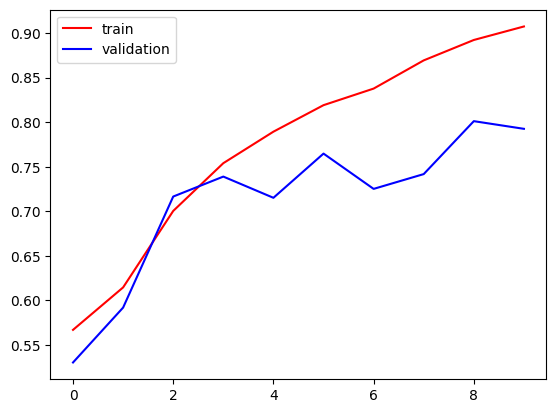

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

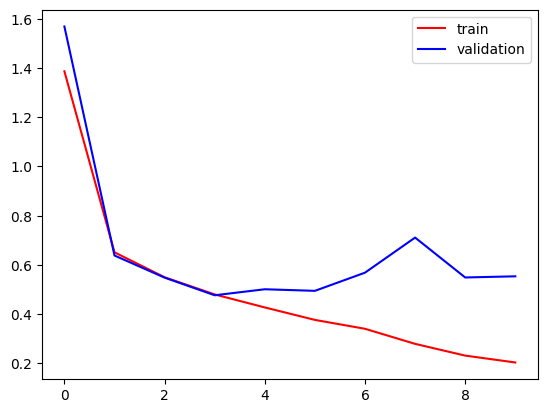

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()